In [1]:
# Instalasi pustaka yang diperlukan
!pip install pandas textblob nltk wordcloud

# Impor pustaka
import pandas as pd
from textblob import TextBlob
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unduh dataset NLTK yang diperlukan
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Muat data dari file CSV yang diunggah
from google.colab import files
uploaded = files.upload()

# Baca file CSV ke dalam DataFrame
df = pd.read_csv('query_result_2024-06-07T05_31_02.494+07_00.csv')

# Tampilkan beberapa baris pertama dari DataFrame
df.head()

Saving query_result_2024-06-07T05_31_02.494+07_00.csv to query_result_2024-06-07T05_31_02.494+07_00.csv


<ipython-input-2-11bc32b7aee4>:6: DtypeWarning: Columns (0,28,29,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('query_result_2024-06-07T05_31_02.494+07_00.csv')


,ID,Bundle,Bundle Name,Content,Content Date,Label,Taxonomy Names,Is Sentiment,Is User ID,Is User Fast Followers Count,...,Ss Extended Entities Media 0 URL,Ss Entities Urls 0 URL,Ss Favorited,Ss Is Quote Status,Ss Possibly Sensitive,Ss Possibly Sensitive Editable,Timestamp,Tanggal,Imported Date,Contentp
0,1798174796729233633,socmed,twitter,@IndosatCare Di kampung saya di salah satu dae...,2024-06-05T02:07:34Z,FahmiPalala,indosat,1,4.199837e+08,0.0,...,NaN,NaN,False,False,NaN,NaN,2024-06-05T19:50:01.720Z,2024-06-05,2024-06-05T20:13:58,indosatcare kampung salah satu daerah kab tana...
1,1775189182178312320,socmed,twitter,"@neverens @dollmenfes Woh mauu, kira2 bisa kir...",2024-04-02T15:50:57Z,LimBosse,sumatera-barat,0,1.602644e+18,0.0,...,NaN,NaN,False,False,NaN,NaN,2024-06-05T19:30:54.333Z,2024-06-05,2024-06-05T20:13:58,neverens dollmenfes woh mauu kira kirim
2,1775191483022495864,socmed,twitter,"Ada Bank Bangkrut di Sumatra Barat, OJK Jelask...",2024-04-02T16:00:05Z,Bisniscom,sumatra-barat,0,1.186463e+08,0.0,...,NaN,NaN,False,False,False,True,2024-06-05T19:23:51.197Z,2024-06-05,2024-06-05T20:13:58,bank bangkrut sumatra ojk jelaskan nasib uang ...
3,1775191795732975857,socmed,twitter,Jadwal Imsak dan Buka Puasa di Provinsi Sumate...,2024-04-02T16:01:20Z,FlipsFlops88,sumatera-barat,0,3.059994e+08,0.0,...,NaN,NaN,False,False,False,True,2024-06-05T19:22:52.901Z,2024-06-05,2024-06-05T20:13:58,jadwal imsak buka puasa provinsi april https c...
4,1798343084306317732,socmed,twitter,Ini dia wakilmu di Senayan: M Shadiq Pasadigoe...,2024-06-05T13:16:17Z,NasDem,partai,0,1.091492e+08,0.0,...,NaN,NaN,False,False,False,True,2024-06-05T19:20:05.918Z,2024-06-05,2024-06-05T20:13:58,dia wakilmu senayan shadiq pasadigoe kakak sha...


In [6]:
# Fungsi untuk menghitung sentimen
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Terapkan fungsi sentimen ke kolom yang berisi teks
# Misalnya, kolom teks bernama 'review'
df['sentiment'] = df['Content'].apply(get_sentiment)

# Lihat hasil analisis sentimen
df[['Content', 'sentiment']].head()

,Content,sentiment
0,@IndosatCare Di kampung saya di salah satu dae...,0.0
1,"@neverens @dollmenfes Woh mauu, kira2 bisa kir...",0.0
2,"Ada Bank Bangkrut di Sumatra Barat, OJK Jelask...",0.0
3,Jadwal Imsak dan Buka Puasa di Provinsi Sumate...,0.0
4,Ini dia wakilmu di Senayan: M Shadiq Pasadigoe...,0.0


In [7]:
# Profiling dasar
profile = df.describe()
profile

# Profiling tambahan seperti distribusi sentimen
sentiment_distribution = df['sentiment'].describe()
sentiment_distribution

count    30975.000000
mean         0.008424
std          0.079037
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sentiment, dtype: float64

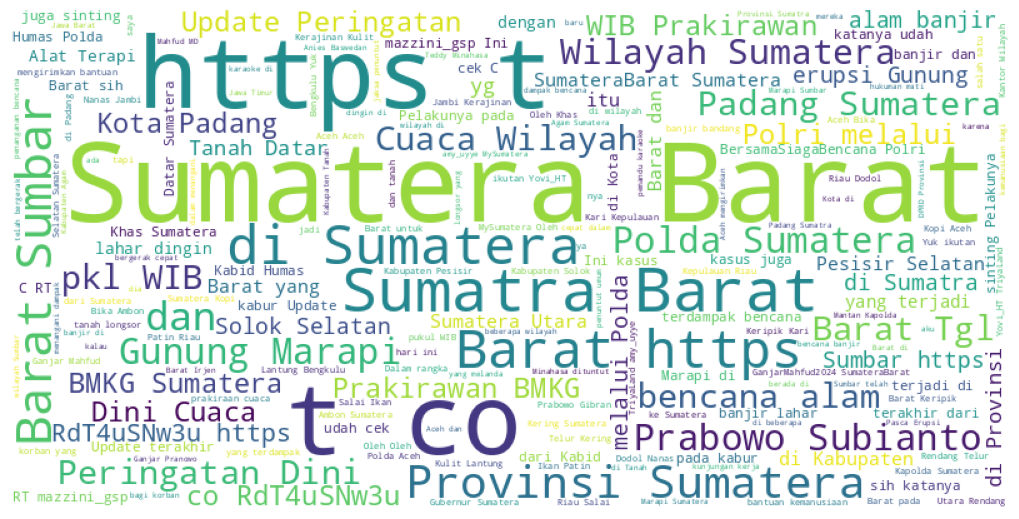

In [9]:
# Gabungkan semua teks untuk membuat word cloud
all_text = ' '.join(df['Content'].astype(str))

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)

# Tampilkan word cloud
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()